In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sci

# Perceptron

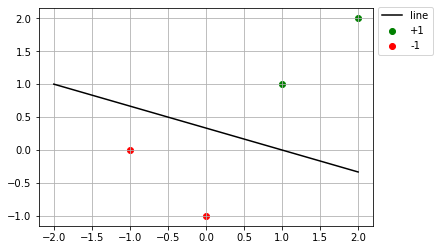

In [2]:
plt.scatter([1,2] ,[1,2], color='g', label='+1')
plt.scatter([0, -1],[-1, 0], color='r', label='-1')

x = np.linspace(-2, 2)
def w(i):
    return (1-i)/3

plt.plot(x, w(x), label='line', color='black')
plt.grid()
plt.legend(bbox_to_anchor=(1, 1.03))
plt.show()

The weights are: [[ 0. ]
 [ 0.2]
 [ 0. ]
 [-0.2]] 

Line is: -infx + nan


C:\Users\guilh\anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\guilh\anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
C:\Users\guilh\anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in multiply


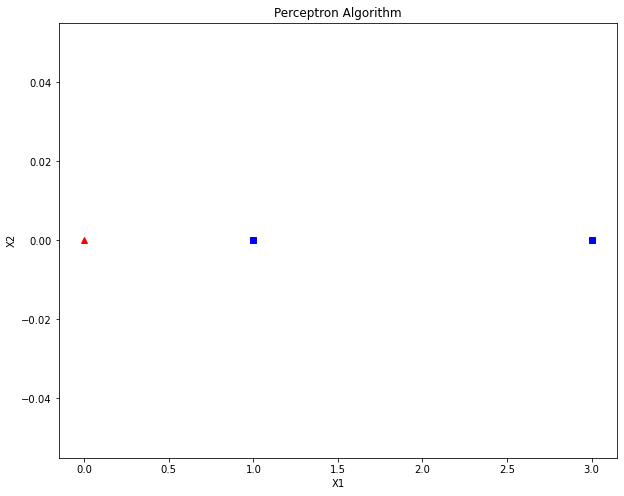

In [3]:
# Rosenblatt algorithm (SIGN = [-1, 1])

#X = np.array([[1, 0, 0], [3, 0, 0], [0, 0, 1]])
#t = np.array([1, 1, -1])

X = np.array([[1, 0, 0], [3, 0, 0], [0, 0, 1]])
y = np.array([1, 1, -1])

lr = 0.1 # learning rate
epochs = 1000 # epochs
    
m, n = X.shape

w = np.zeros((n+1, 1))

for epoch in range(epochs):
    for idx, x_i in enumerate(X):
        x_i = np.insert(x_i, 0, 1).reshape(-1,1)
        y_hat = np.sign(np.dot(x_i.T, w))
        
        if (np.squeeze(y_hat) - y[idx]) != 0:
            w += lr*((y[idx] - y_hat)*x_i)

x1 = [min(X[:,0]), max(X[:,0])]
m = -w[1]/w[2]
c = -w[0]/w[2]
x2 = m*x1 + c

# Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y==-1], X[:, 1][y==-1], "r^")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title('Perceptron Algorithm')
plt.plot(x1, x2, 'g-')
    
print(f'The weights are: {w} \n')
print(f'Line is: {round(m[0], 3)}x + {round(c[0], 3)}')

# 1-d Gaussian model for likelihoods

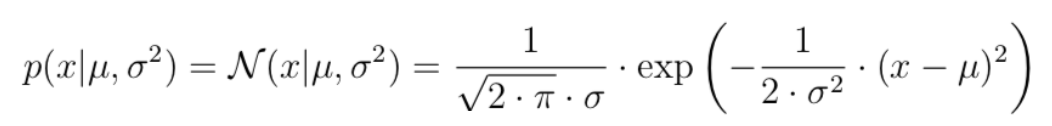

In [4]:
# Dados tabulares
# Deixa descomentado os pontos das outras classes
pontos = [
    #[0,10],
    #[0,20],
    #[10,10],
    #[5,20]
    [30,30],
    [40,40],
    [50,30],
    [50,50]
]
df = pd.DataFrame(pontos)

# Probabilidade da classe
prob = 1/2

In [5]:
# Query vector
x = np.array([5,10])

# Dimension of attributes
d = len(pontos[0])

In [6]:
print("Médias")
display(df.mean().round(4).tolist())
print("Desvio padrão")
display(df.std(ddof=0).round(4).tolist())

Médias


[42.5, 37.5]

Desvio padrão


[8.2916, 8.2916]

In [7]:
sci.norm(df.mean()[i], df.std(ddof=0)[i]).pdf(x[i])

NameError: name 'i' is not defined

In [ ]:
produto = 1
for i in range(d):
    y = sci.norm(df.mean()[i], df.std(ddof=0)[i]).pdf(x[i])
    print(y)
    produto = produto * y
    
print(f"Numerador da classe é: {'{:.4e}'.format(prob * produto)}")
print('AGORA NORMALIZAR A P(C=A| x_query) = P(C=A, x_query) / (P(C=A, x_query) + P(C=B, x_query))')

# 2-d Gaussian model for likelihoods

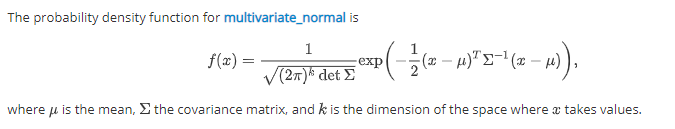

In [ ]:
#Pontos
pontos = [
    [0,10],
    [0,20],
    [10,10],
    [5,20]
    #[30,30],
    #[40,40],
    #[50,30],
    #[50,50]
]

df = pd.DataFrame(pontos)

# Probabilidade da classe
prob = 1/2

In [ ]:
# Query vector
x = np.array([5,10])

In [ ]:
print("Médias")
display(df.mean().round(4))
print("Desvio padrão")
display(df.cov(ddof=0).round(4))

In [ ]:
x = np.array([5,10])
y = sci.multivariate_normal.pdf(x, mean=df.mean(), cov=df.cov(ddof=0))
print(f"Numerador da classe é: {'{:.4e}'.format(prob * y)}")
print('AGORA NORMALIZAR A P(C=A| x_query) = P(C=A, x_query) / (P(C=A, x_query) + P(C=B, x_query))')